In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import seaborn as sns
from pathlib import Path

In [32]:
cases = pd.read_csv("/project/biocomplexity/COVID-19_commons/data/NyTimes/us-counties.csv")
cases.date = pd.to_datetime(cases.date)
cases = cases[(cases.county == "Harris") & (cases.state == "Texas")]
cases = cases.pivot(index="date", columns="fips", values="cases").diff().rolling(7).mean()
cases.columns = ["cases"]
# cases

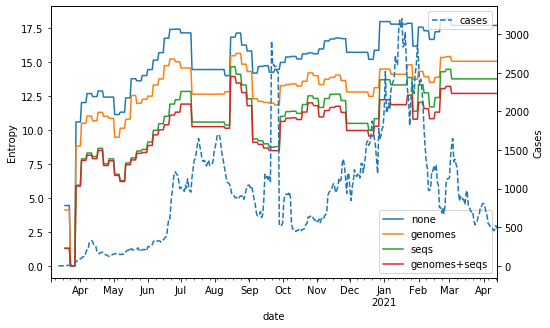

In [36]:
uncert = pd.concat(map(pd.read_csv, glob("../data/Houston_output/window_5_step_5/*/uncert.csv")))
uncert["date"] = pd.to_datetime(uncert.graph_name.apply(lambda row: row.split("_")[0]))
# uncert["end"] = pd.to_datetime(uncert.graph_name.apply(lambda row: row.split("_")[-1]))
uncert = uncert.set_index("date").drop(columns=["graph_name"])
uncert = uncert.reindex(cases.index)
uncert = uncert.fillna(method="ffill")

uncert.columns = ["none", "genomes", "seqs", "genomes+seqs"]

fig, ax = plt.subplots(figsize=(8,5))

twinx = ax.twinx()

uncert.plot(ax=ax)
cases.plot(ax=twinx, linestyle="--")

ax.set_ylabel("Entropy")
twinx.set_ylabel("Cases")
plt.savefig("first_pass_entropy_harris_county.png")